![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)
# <center> ANÁLISIS NUMÉRICO I - MODELACIÓN NUMÉRICA - MÉTODOS MATEMÁTICOS Y NUMÉRICOS

## <CENTER> ERRORES Y REPRESENTACIÓN NUMÉRICA

## <center> Ejemplo Práctico

Ejemplo de cómo inciden los errores en los resultados de un modelo numérico

## Ecuación diferencial

Vamos a resolver la siguiente ecuación diferencial

\begin{equation}
\frac{\mathrm d y}{\mathrm d t}=\frac{y}{4}\left(1-\frac{y}{20}\right).
\end{equation}

Primero importamos <b>Numpy</b>, <b>MatPlotLib</b> y <b>Pandas</b>:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Definimos la función de la derivada primera:

In [7]:
def f1(t,y):
    return y/4*(1-y/20)

Definimos el dominio (valores $t_0$ y $t_f$) y el valor inicial $y_0$ de la ecuación diferencial:

In [8]:
t0=-2.05
tf=-0.05
y0=0.6113
h=0.05

Para verificar que todo está bien, calculamos el valor de $f(t_0,y_0)$:

In [9]:
f1(t0,y0)

0.148153903875

### Método de Euler Explícito

Para resolver esta ecuación diferencial, aplicaremos el <b>Método de Euler Explícito</b>. El código es sencillo:

In [12]:
#Método de Euler Explícito
def EE(f,t0,tf,y0,h):
    N=int((tf-t0)/h)
   # t=np.linspace(t0,tf,N+1)
    sol=np.zeros([N+2,2])
    sol[0,0]=t0
    sol[0,1]=y0
    for j in range(1,N+2):
        sol[j,0]=sol[j-1,0]+h
        sol[j,1]=np.round(sol[j-1,1]+h*f(sol[j-1,0],sol[j-1,1]),4)
    return sol

#### Resultados

Los resultados obtenidos al aplicar el Método de Euler Explícito son:

In [13]:
EE(f1,t0,tf,y0,h)

array([[-2.05  ,  0.6113],
       [-2.    ,  0.6187],
       [-1.95  ,  0.6262],
       [-1.9   ,  0.6338],
       [-1.85  ,  0.6415],
       [-1.8   ,  0.6493],
       [-1.75  ,  0.6572],
       [-1.7   ,  0.6651],
       [-1.65  ,  0.6731],
       [-1.6   ,  0.6812],
       [-1.55  ,  0.6894],
       [-1.5   ,  0.6977],
       [-1.45  ,  0.7061],
       [-1.4   ,  0.7146],
       [-1.35  ,  0.7232],
       [-1.3   ,  0.7319],
       [-1.25  ,  0.7407],
       [-1.2   ,  0.7496],
       [-1.15  ,  0.7586],
       [-1.1   ,  0.7677],
       [-1.05  ,  0.7769],
       [-1.    ,  0.7862],
       [-0.95  ,  0.7956],
       [-0.9   ,  0.8051],
       [-0.85  ,  0.8148],
       [-0.8   ,  0.8246],
       [-0.75  ,  0.8345],
       [-0.7   ,  0.8445],
       [-0.65  ,  0.8546],
       [-0.6   ,  0.8648],
       [-0.55  ,  0.8751],
       [-0.5   ,  0.8856],
       [-0.45  ,  0.8962],
       [-0.4   ,  0.9069],
       [-0.35  ,  0.9177],
       [-0.3   ,  0.9286],
       [-0.25  ,  0.9397],
 

Veremos qué sucede si el valor inicial no es exacto y tiene algún error. Asumiremos que los errores relativos son: 
* $e_1=+0{,}05$,
* $e_2=+0{,}025$, 
* $e_3=-0{,}025$ y 
* $e_4=-0{,}05$.

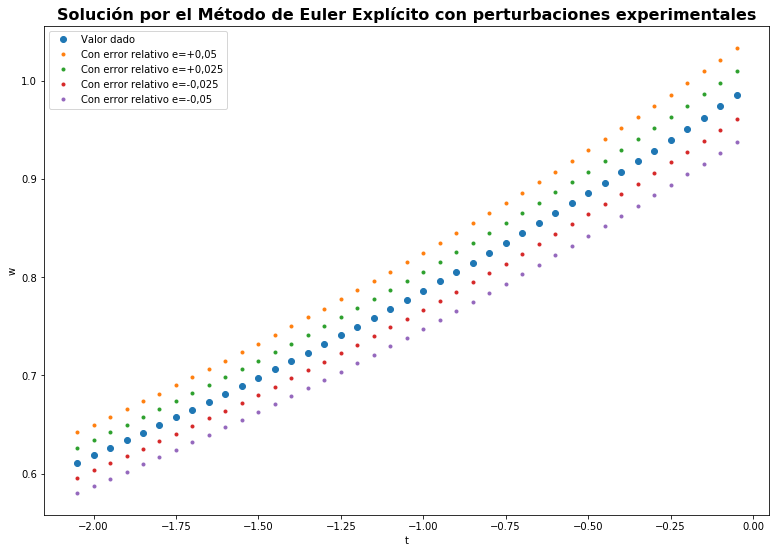

In [196]:
plt.figure(figsize=(13,9))
plt.plot(EE(f1,t0,tf,y0,h)[:,0],EE(f1,t0,tf,y0,h)[:,1],'o',label='Valor dado')
plt.plot(EE(f1,t0,tf,y0*1.05,h)[:,0],EE(f1,t0,tf,y0*1.05,h)[:,1],'.',label='Con error relativo e=+0,05')
plt.plot(EE(f1,t0,tf,y0*1.025,h)[:,0],EE(f1,t0,tf,y0*1.025,h)[:,1],'.',label='Con error relativo e=+0,025')
plt.plot(EE(f1,t0,tf,y0*0.975,h)[:,0],EE(f1,t0,tf,y0*0.975,h)[:,1],'.',label='Con error relativo e=-0,025')
plt.plot(EE(f1,t0,tf,y0*0.95,h)[:,0],EE(f1,t0,tf,y0*0.95,h)[:,1],'.',label='Con error relativo e=-0,05')
plt.title('Solución por el Método de Euler Explícito con perturbaciones experimentales',fontsize=16,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)

### Método de Euler Implícito

Aplicaremos otro método, el <b>Método de Euler Implícito</b>. Por las características del método, importaremos la función «optimize» de «Scipy» que nos ayuda a obtener una raíz de una ecuación no lineal:

In [22]:
from scipy import optimize as op 

El código del <b>Método de Euler Implícito</b> es:

In [23]:
#Método de Euler Implícito
def EI(f,t0,tf,y0,h): 
        N=int((tf-t0)/h)
        t=np.zeros(N+2)
        #t=np.linspace(t0,tf,N+1)
        w=np.zeros(N+2)
        sol=np.zeros([N+2,2])
        t[0]=t0
        w[0]= y0
        def aux(wi,args):
            ti,want,h=args
            return np.abs(want+h*f(ti,wi)-wi)
        for i in range(1,N+2):
            t[i]=t[i-1]+h
            initial_guess = w[i-1]
            w[i] = np.round(op.minimize(aux, initial_guess,args=[t[i],w[i-1],h])['x'],4) 
        for i in range(0,N+2):    
            sol[i,0]=t[i]
            sol[i,1]=w[i]
        return sol

#### Resultados

Con los datos del problemas obtenemos los siguientes resultados:

In [24]:
EI(f1,t0,tf,y0,h)

array([[-2.05  ,  0.6113],
       [-2.    ,  0.6188],
       [-1.95  ,  0.6264],
       [-1.9   ,  0.6341],
       [-1.85  ,  0.6419],
       [-1.8   ,  0.6498],
       [-1.75  ,  0.6578],
       [-1.7   ,  0.6658],
       [-1.65  ,  0.6739],
       [-1.6   ,  0.6821],
       [-1.55  ,  0.6904],
       [-1.5   ,  0.6988],
       [-1.45  ,  0.7073],
       [-1.4   ,  0.7159],
       [-1.35  ,  0.7246],
       [-1.3   ,  0.7334],
       [-1.25  ,  0.7423],
       [-1.2   ,  0.7513],
       [-1.15  ,  0.7604],
       [-1.1   ,  0.7697],
       [-1.05  ,  0.7791],
       [-1.    ,  0.7886],
       [-0.95  ,  0.7982],
       [-0.9   ,  0.8079],
       [-0.85  ,  0.8177],
       [-0.8   ,  0.8276],
       [-0.75  ,  0.8376],
       [-0.7   ,  0.8477],
       [-0.65  ,  0.858 ],
       [-0.6   ,  0.8684],
       [-0.55  ,  0.8789],
       [-0.5   ,  0.8895],
       [-0.45  ,  0.9002],
       [-0.4   ,  0.9111],
       [-0.35  ,  0.9221],
       [-0.3   ,  0.9332],
       [-0.25  ,  0.9444],
 

Haremos lo mismo que con el método anterior: veremos qué sucede si el valor inicial no es exacto y tiene algún error. Asumiremos que los errores relativos son: 
* $e_1=+0{,}05$,
* $e_2=+0{,}025$, 
* $e_3=-0{,}025$ y 
* $e_4=-0{,}05$.

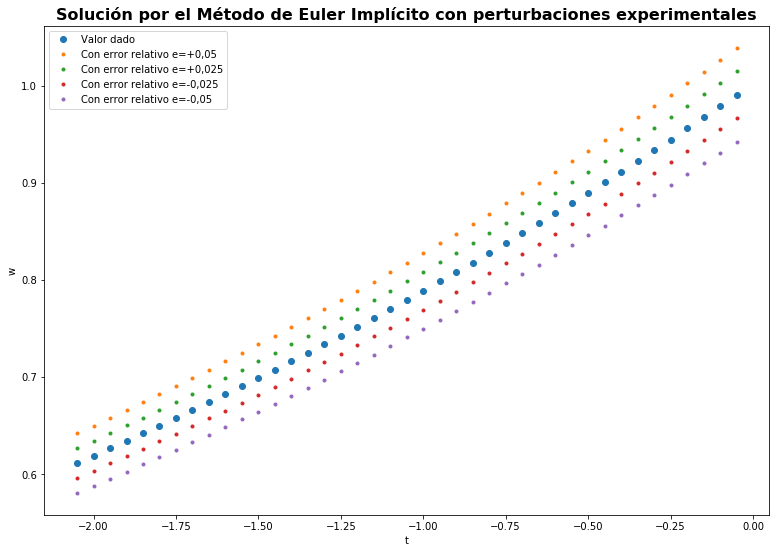

In [25]:
plt.figure(figsize=(13,9))
plt.plot(EI(f1,t0,tf,y0,h)[:,0],EI(f1,t0,tf,y0,h)[:,1],'o',label='Valor dado')
plt.plot(EI(f1,t0,tf,y0*1.05,h)[:,0],EI(f1,t0,tf,y0*1.05,h)[:,1],'.',label='Con error relativo e=+0,05')
plt.plot(EI(f1,t0,tf,y0*1.025,h)[:,0],EI(f1,t0,tf,y0*1.025,h)[:,1],'.',label='Con error relativo e=+0,025')
plt.plot(EI(f1,t0,tf,y0*0.975,h)[:,0],EI(f1,t0,tf,y0*0.975,h)[:,1],'.',label='Con error relativo e=-0,025')
plt.plot(EI(f1,t0,tf,y0*0.95,h)[:,0],EI(f1,t0,tf,y0*0.95,h)[:,1],'.',label='Con error relativo e=-0,05')
plt.title('Solución por el Método de Euler Implícito con perturbaciones experimentales',fontsize=16,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)

### Comparación

Comparemos todos los resultados que hemos obtenido:

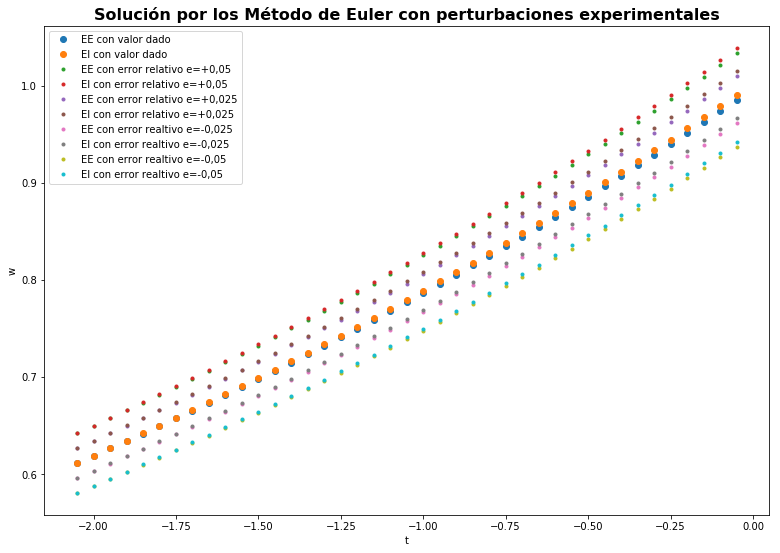

In [26]:
plt.figure(figsize=(13,9))
plt.plot(EE(f1,t0,tf,y0,h)[:,0],EE(f1,t0,tf,y0,h)[:,1],'o',label='EE con valor dado')
plt.plot(EI(f1,t0,tf,y0,h)[:,0],EI(f1,t0,tf,y0,h)[:,1],'o',label='EI con valor dado')
plt.plot(EE(f1,t0,tf,y0*1.05,h)[:,0],EE(f1,t0,tf,y0*1.05,h)[:,1],'.',label='EE con error relativo e=+0,05')
plt.plot(EI(f1,t0,tf,y0*1.05,h)[:,0],EI(f1,t0,tf,y0*1.05,h)[:,1],'.',label='EI con error relativo e=+0,05')
plt.plot(EE(f1,t0,tf,y0*1.025,h)[:,0],EE(f1,t0,tf,y0*1.025,h)[:,1],'.',label='EE con error relativo e=+0,025')
plt.plot(EI(f1,t0,tf,y0*1.025,h)[:,0],EI(f1,t0,tf,y0*1.025,h)[:,1],'.',label='EI con error relativo e=+0,025')
plt.plot(EE(f1,t0,tf,y0*0.975,h)[:,0],EE(f1,t0,tf,y0*0.975,h)[:,1],'.',label='EE con error realtivo e=-0,025')
plt.plot(EI(f1,t0,tf,y0*0.975,h)[:,0],EI(f1,t0,tf,y0*0.975,h)[:,1],'.',label='EI con error realtivo e=-0,025')
plt.plot(EE(f1,t0,tf,y0*0.95,h)[:,0],EE(f1,t0,tf,y0*0.95,h)[:,1],'.',label='EE con error realtivo e=-0,05')
plt.plot(EI(f1,t0,tf,y0*0.95,h)[:,0],EI(f1,t0,tf,y0*0.95,h)[:,1],'.',label='EI con error realtivo e=-0,05')
plt.title('Solución por los Método de Euler con perturbaciones experimentales',fontsize=16,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)

### Métodos de Runge Kutta de Orden 2

Aplicaremos los Métodos de Runge Kutta Orden 2. Empezaremos con el <b>Método del Punto Medio</b>.

#### Método del Punto Medio

El código del <b>Método del Punto Medio</b> es:

In [27]:
#Método del Punto Medio
def PtoMedio(f,t0,tf,y0,h):
        N=int((tf-t0)/h)
        t=np.zeros(N+2)
        w=np.zeros(N+2)
        t[0]=t0
        w[0]=y0
        sol=np.zeros([N+2,2])
        for i in range(1,N+2):
            t[i]=t[i-1]+h
            w[i]=np.round(w[i-1]+h*f(t[i-1]+h/2,w[i-1]+(h/2)*f(t[i-1],w[i-1])),4)
        for j in range(0,N+2):
            sol[j,0]=t[j]
            sol[j,1]=w[j]
        return sol

#### Resultados
Con los datos del problema obtenemos los siguientes resultados:

In [28]:
PtoMedio(f1,t0,tf,y0,h)

array([[-2.05  ,  0.6113],
       [-2.    ,  0.6188],
       [-1.95  ,  0.6263],
       [-1.9   ,  0.6339],
       [-1.85  ,  0.6416],
       [-1.8   ,  0.6494],
       [-1.75  ,  0.6573],
       [-1.7   ,  0.6653],
       [-1.65  ,  0.6734],
       [-1.6   ,  0.6816],
       [-1.55  ,  0.6899],
       [-1.5   ,  0.6983],
       [-1.45  ,  0.7068],
       [-1.4   ,  0.7154],
       [-1.35  ,  0.7241],
       [-1.3   ,  0.7329],
       [-1.25  ,  0.7418],
       [-1.2   ,  0.7508],
       [-1.15  ,  0.7599],
       [-1.1   ,  0.7691],
       [-1.05  ,  0.7784],
       [-1.    ,  0.7878],
       [-0.95  ,  0.7973],
       [-0.9   ,  0.8069],
       [-0.85  ,  0.8166],
       [-0.8   ,  0.8264],
       [-0.75  ,  0.8364],
       [-0.7   ,  0.8465],
       [-0.65  ,  0.8567],
       [-0.6   ,  0.867 ],
       [-0.55  ,  0.8774],
       [-0.5   ,  0.8879],
       [-0.45  ,  0.8986],
       [-0.4   ,  0.9094],
       [-0.35  ,  0.9203],
       [-0.3   ,  0.9313],
       [-0.25  ,  0.9425],
 

Haremos lo mismo que con los métodos anteriores: veremos qué sucede si el valor inicial no es exacto y tiene algún error. Asumiremos que los errores relativos son: 
* $e_1=+0{,}05$,
* $e_2=+0{,}025$, 
* $e_3=-0{,}025$ y 
* $e_4=-0{,}05$.

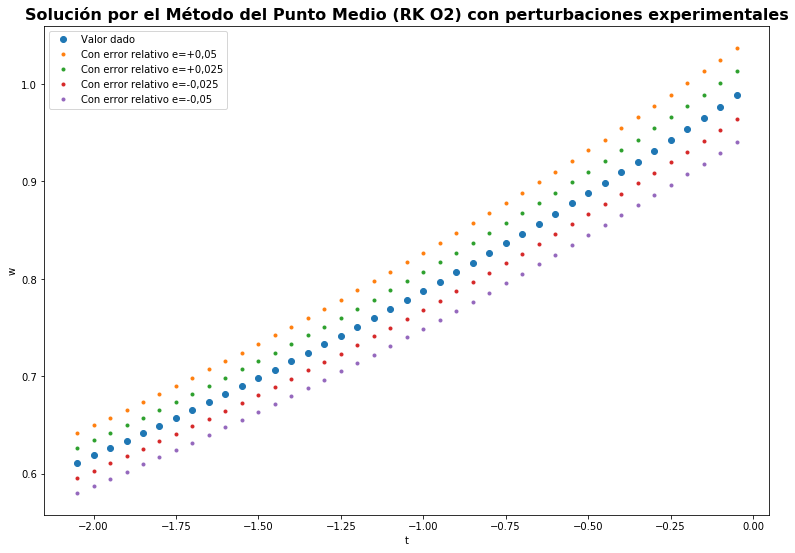

In [29]:
plt.figure(figsize=(13,9))
plt.plot(PtoMedio(f1,t0,tf,y0,h)[:,0],PtoMedio(f1,t0,tf,y0,h)[:,1],'o',label='Valor dado')
plt.plot(PtoMedio(f1,t0,tf,y0*1.05,h)[:,0],PtoMedio(f1,t0,tf,y0*1.05,h)[:,1],'.',label='Con error relativo e=+0,05')
plt.plot(PtoMedio(f1,t0,tf,y0*1.025,h)[:,0],PtoMedio(f1,t0,tf,y0*1.025,h)[:,1],'.',label='Con error relativo e=+0,025')
plt.plot(PtoMedio(f1,t0,tf,y0*0.975,h)[:,0],PtoMedio(f1,t0,tf,y0*0.975,h)[:,1],'.',label='Con error relativo e=-0,025')
plt.plot(PtoMedio(f1,t0,tf,y0*0.95,h)[:,0],PtoMedio(f1,t0,tf,y0*0.95,h)[:,1],'.',label='Con error relativo e=-0,05')
plt.title('Solución por el Método del Punto Medio (RK O2) con perturbaciones experimentales',fontsize=16,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)

#### Método de Euler Mejorado

Otro método para resolver ecuaiones diferenciales es <b>Método de Euler Mejorado</b>. El código es:

In [30]:
#Método de Euler Mejorado
def EulerMej(f,t0,tf,y0,h): 
        N=int((tf-t0)/h)
        t=np.zeros(N+2)
        w=np.zeros(N+2)
        sol=np.zeros([N+2,2])
        t[0]=t0
        w[0]= y0
        for i in range(1,N+2):
            t[i]=t[i-1]+h
            w[i]=np.round(w[i-1]+(h/2)*(f(t[i-1],w[i-1])+f(t[i],w[i-1]+h*f(t[i-1],w[i-1]))),4)
        for i in range (0,N+2):
            sol[i,0]=t[i]
            sol[i,1]=w[i]
        return sol


Definido el algoritmo, obtenemos los resultados:

In [31]:
EulerMej(f1,t0,tf,y0,h)

array([[-2.05  ,  0.6113],
       [-2.    ,  0.6188],
       [-1.95  ,  0.6263],
       [-1.9   ,  0.6339],
       [-1.85  ,  0.6416],
       [-1.8   ,  0.6494],
       [-1.75  ,  0.6573],
       [-1.7   ,  0.6653],
       [-1.65  ,  0.6734],
       [-1.6   ,  0.6816],
       [-1.55  ,  0.6899],
       [-1.5   ,  0.6983],
       [-1.45  ,  0.7068],
       [-1.4   ,  0.7154],
       [-1.35  ,  0.7241],
       [-1.3   ,  0.7329],
       [-1.25  ,  0.7418],
       [-1.2   ,  0.7508],
       [-1.15  ,  0.7599],
       [-1.1   ,  0.7691],
       [-1.05  ,  0.7784],
       [-1.    ,  0.7878],
       [-0.95  ,  0.7973],
       [-0.9   ,  0.8069],
       [-0.85  ,  0.8166],
       [-0.8   ,  0.8264],
       [-0.75  ,  0.8364],
       [-0.7   ,  0.8465],
       [-0.65  ,  0.8567],
       [-0.6   ,  0.867 ],
       [-0.55  ,  0.8774],
       [-0.5   ,  0.8879],
       [-0.45  ,  0.8986],
       [-0.4   ,  0.9094],
       [-0.35  ,  0.9203],
       [-0.3   ,  0.9313],
       [-0.25  ,  0.9425],
 

Haremos lo mismo que con los métodos anteriores: veremos qué sucede si el valor inicial no es exacto y tiene algún error. Asumiremos que los errores relativos son:

* $e_1=+0,05$,
* $e_2=+0,025$,
* $e_3=-0,025$ y
* $e_4=−0,05$.

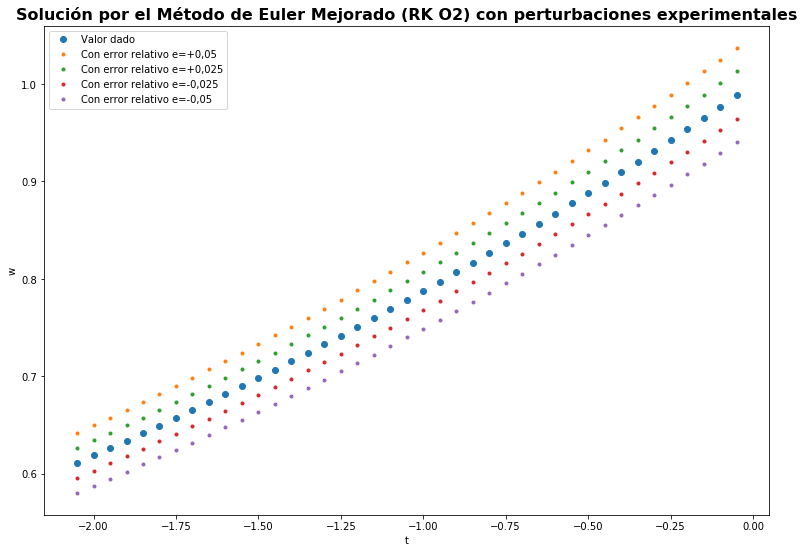

In [32]:
plt.figure(figsize=(13,9))
plt.plot(EulerMej(f1,t0,tf,y0,h)[:,0],EulerMej(f1,t0,tf,y0,h)[:,1],'o',label='Valor dado')
plt.plot(EulerMej(f1,t0,tf,y0*1.05,h)[:,0],EulerMej(f1,t0,tf,y0*1.05,h)[:,1],'.',label='Con error relativo e=+0,05')
plt.plot(EulerMej(f1,t0,tf,y0*1.025,h)[:,0],EulerMej(f1,t0,tf,y0*1.025,h)[:,1],'.',label='Con error relativo e=+0,025')
plt.plot(EulerMej(f1,t0,tf,y0*0.975,h)[:,0],EulerMej(f1,t0,tf,y0*0.975,h)[:,1],'.',label='Con error relativo e=-0,025')
plt.plot(EulerMej(f1,t0,tf,y0*0.95,h)[:,0],EulerMej(f1,t0,tf,y0*0.95,h)[:,1],'.',label='Con error relativo e=-0,05')
plt.title('Solución por el Método de Euler Mejorado (RK O2) con perturbaciones experimentales',fontsize=16,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)

### Método de Runge Kutta de Orden 3

El código del <b>Método de Runge Kutta de Orden 3</b> es el siguiente:

In [33]:
#Método de Runge Kutta de Orden 3
def RK3(f,t0,tf,y0,h):
        N=int((tf-t0)/h)
        t=np.zeros(N+2)
        w=np.zeros(N+2)
        sol=np.zeros([N+2,2])
        t[0]=t0
        w[0]= y0
        for i in range(1,N+2):
            t[i]=t[i-1]+h
            k1=np.round(h*f(t[i-1],w[i-1]),4)
            k2=np.round(h*f(t[i-1]+h/2,w[i-1]+0.5*k1),4)
            k3=np.round(h*f(t[i-1]+h,w[i-1]-k1+2*k2),4)
            w[i]=np.round(w[i-1]+(1/6)*(k1+4*k2+k3),4)
        for i in range(0,N+2):
            sol[i,0]=t[i]
            sol[i,1]=w[i]
        return sol

Con el algoritmo definido, obtenemos los siguientes resultados:

In [34]:
RK3(f1,t0,tf,y0,h)

array([[-2.05  ,  0.6113],
       [-2.    ,  0.6188],
       [-1.95  ,  0.6263],
       [-1.9   ,  0.6339],
       [-1.85  ,  0.6416],
       [-1.8   ,  0.6494],
       [-1.75  ,  0.6573],
       [-1.7   ,  0.6653],
       [-1.65  ,  0.6734],
       [-1.6   ,  0.6816],
       [-1.55  ,  0.6899],
       [-1.5   ,  0.6983],
       [-1.45  ,  0.7068],
       [-1.4   ,  0.7154],
       [-1.35  ,  0.7241],
       [-1.3   ,  0.7329],
       [-1.25  ,  0.7418],
       [-1.2   ,  0.7508],
       [-1.15  ,  0.7599],
       [-1.1   ,  0.7691],
       [-1.05  ,  0.7784],
       [-1.    ,  0.7878],
       [-0.95  ,  0.7973],
       [-0.9   ,  0.8069],
       [-0.85  ,  0.8166],
       [-0.8   ,  0.8264],
       [-0.75  ,  0.8364],
       [-0.7   ,  0.8465],
       [-0.65  ,  0.8567],
       [-0.6   ,  0.867 ],
       [-0.55  ,  0.8774],
       [-0.5   ,  0.8879],
       [-0.45  ,  0.8986],
       [-0.4   ,  0.9094],
       [-0.35  ,  0.9203],
       [-0.3   ,  0.9313],
       [-0.25  ,  0.9425],
 

## Comparación de métodos

Comparemos ahora los resultados obtenidos con los tres métodos analizados con el valor inicial sin cambios:

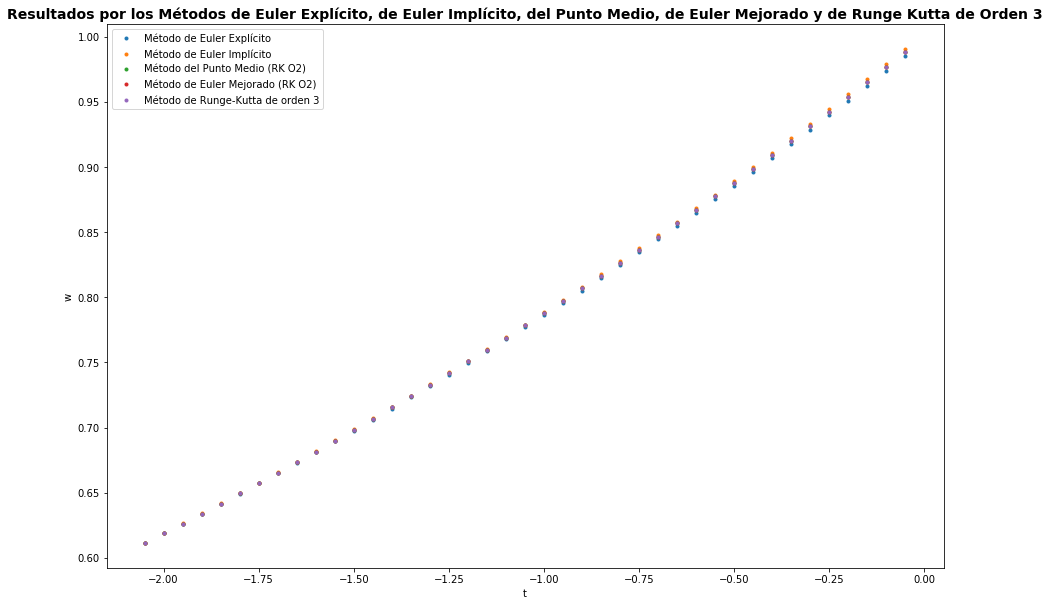

In [35]:
plt.figure(figsize=(15,10))
plt.plot(EE(f1,t0,tf,y0,h)[:,0],EE(f1,t0,tf,y0,h)[:,1],'.',label='Método de Euler Explícito')
plt.plot(EI(f1,t0,tf,y0,h)[:,0],EI(f1,t0,tf,y0,h)[:,1],'.',label='Método de Euler Implícito')
plt.plot(PtoMedio(f1,t0,tf,y0,h)[:,0],PtoMedio(f1,t0,tf,y0,h)[:,1],'.',label='Método del Punto Medio (RK O2)')
plt.plot(EulerMej(f1,t0,tf,y0,h)[:,0],EulerMej(f1,t0,tf,y0,h)[:,1],'.',label='Método de Euler Mejorado (RK O2)')
plt.plot(RK3(f1,t0,tf,y0,h)[:,0],RK3(f1,t0,tf,y0,h)[:,1],'.',label='Método de Runge-Kutta de orden 3')
plt.title('Resultados por los Métodos de Euler Explícito, de Euler Implícito, del Punto Medio, de Euler Mejorado y de Runge Kutta de Orden 3',fontsize=14,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)

Veamos que sucede con los errores en el valor inicial. Analizaremos solamente con los errores $$e=+0.05$$ y $$e=-0.05$$:

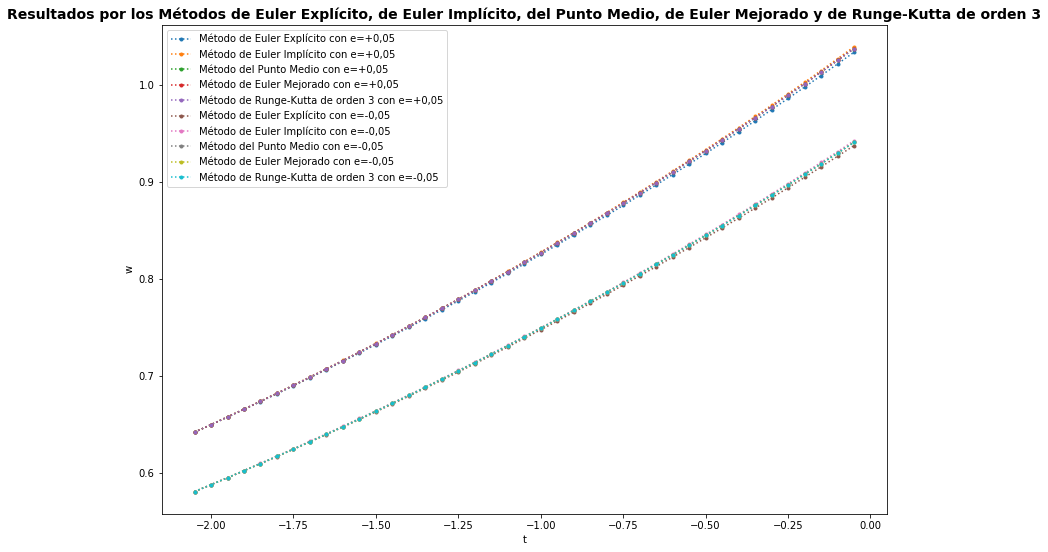

In [201]:
plt.figure(figsize=(13,9))
plt.plot(EE(f1,t0,tf,y0*1.05,h)[:,0],EE(f1,t0,tf,y0*1.05,h)[:,1],'.:',label='Método de Euler Explícito con e=+0,05')
plt.plot(EI(f1,t0,tf,y0*1.05,h)[:,0],EI(f1,t0,tf,y0*1.05,h)[:,1],'.:',label='Método de Euler Implícito con e=+0,05')
plt.plot(PtoMedio(f1,t0,tf,y0*1.05,h)[:,0],PtoMedio(f1,t0,tf,y0*1.05,h)[:,1],'.:',label='Método del Punto Medio con e=+0,05')
plt.plot(EulerMej(f1,t0,tf,y0*1.05,h)[:,0],EulerMej(f1,t0,tf,y0*1.05,h)[:,1],'.:',label='Método de Euler Mejorado con e=+0,05')
plt.plot(RK3(f1,t0,tf,y0*1.05,h)[:,0],RK3(f1,t0,tf,y0*1.05,h)[:,1],'.:',label='Método de Runge-Kutta de orden 3 con e=+0,05')
plt.plot(EE(f1,t0,tf,y0*0.95,h)[:,0],EE(f1,t0,tf,y0*0.95,h)[:,1],'.:',label='Método de Euler Explícito con e=-0,05')
plt.plot(EI(f1,t0,tf,y0*0.95,h)[:,0],EI(f1,t0,tf,y0*0.95,h)[:,1],'.:',label='Método de Euler Implícito con e=-0,05')
plt.plot(PtoMedio(f1,t0,tf,y0*0.95,h)[:,0],PtoMedio(f1,t0,tf,y0*0.95,h)[:,1],'.:',label='Método del Punto Medio con e=-0,05')
plt.plot(EulerMej(f1,t0,tf,y0*0.95,h)[:,0],EulerMej(f1,t0,tf,y0*0.95,h)[:,1],'.:',label='Método de Euler Mejorado con e=-0,05')
plt.plot(RK3(f1,t0,tf,y0*0.95,h)[:,0],RK3(f1,t0,tf,y0*0.95,h)[:,1],'.:',label='Método de Runge-Kutta de orden 3 con e=-0,05')
plt.title('Resultados por los Métodos de Euler Explícito, de Euler Implícito, del Punto Medio, de Euler Mejorado y de Runge-Kutta de orden 3',fontsize=14,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)

Graficamos los resultados para distintos pasos $h$: 
* $h=0{,}1$,
* $h=0{,}05$, 
* $h=0{,}01$ y,
* $h=0{,}005$.

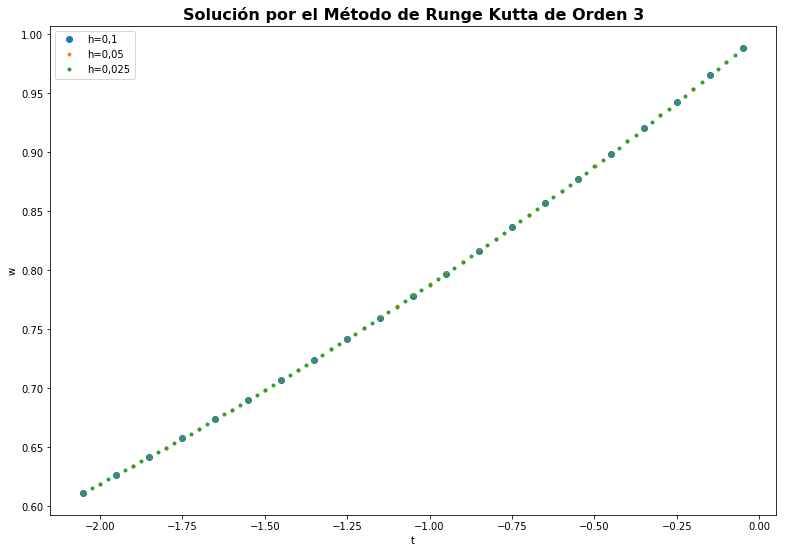

In [127]:
plt.figure(figsize=(13,9))
plt.plot(RK3(f1,t0,tf,y0,2*h)[:,0],RK3(f1,t0,tf,y0,2*h)[:,1],'o',label='h=0,1')
plt.plot(RK3(f1,t0,tf,y0,h)[:,0],RK3(f1,t0,tf,y0,h)[:,1],'.',label='h=0,05')
plt.plot(RK3(f1,t0,tf,y0,h/2)[:,0],RK3(f1,t0,tf,y0,h/2)[:,1],'.',label='h=0,025')
#plt.plot(RK3(f1,t0,tf,y0,h/10)[:,0],RK3(f1,t0,tf,y0,h/10)[:,1],'.',label='h=0,005')
plt.title('Solución por el Método de Runge Kutta de Orden 3',fontsize=16,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)

### Método de Runge Kutta de Orden 4

El código del <b>Método de Runge Kutta de Orden 4</b> es el siguiente:

In [183]:
#Método de Runge Kutta de Orden 4
def RK4(f,t0,tf,y0,h): 
        N=int((tf-t0)/h)
        t=np.linspace(t0,tf,N+2)
        w=np.zeros(N+2)
        sol=np.zeros([N+2,2])
        w[0]=y0
        for i in range(1,N+2):
            k1=h*f(t[i-1],w[i-1])
            k2=h*f(t[i-1]+h/2,w[i-1]+0.5*k1)
            k3=h*f(t[i-1]+h/2,w[i-1]+0.5*k2)
            k4=h*f(t[i-1]+h,w[i-1]+k3)
            w[i]=w[i-1]+(1/6)*(k1+2*k2+2*k3+k4)
        for i in range(0,N+2):
            sol[i,0]=t[i]
            sol[i,1]=w[i]
        return sol

Con el algoritmo definido, los resultados obtenidos son:

In [184]:
RK4(f1,t0,tf,y0,0.05)

array([[-2.05      ,  0.6113    ],
       [-2.        ,  0.61875132],
       [-1.95      ,  0.62629054],
       [-1.9       ,  0.63391861],
       [-1.85      ,  0.64163651],
       [-1.8       ,  0.64944523],
       [-1.75      ,  0.65734575],
       [-1.7       ,  0.66533908],
       [-1.65      ,  0.67342622],
       [-1.6       ,  0.6816082 ],
       [-1.55      ,  0.68988603],
       [-1.5       ,  0.69826077],
       [-1.45      ,  0.70673344],
       [-1.4       ,  0.71530511],
       [-1.35      ,  0.72397685],
       [-1.3       ,  0.73274972],
       [-1.25      ,  0.7416248 ],
       [-1.2       ,  0.75060319],
       [-1.15      ,  0.75968599],
       [-1.1       ,  0.76887431],
       [-1.05      ,  0.77816927],
       [-1.        ,  0.78757199],
       [-0.95      ,  0.79708361],
       [-0.9       ,  0.80670528],
       [-0.85      ,  0.81643816],
       [-0.8       ,  0.82628341],
       [-0.75      ,  0.83624221],
       [-0.7       ,  0.84631574],
       [-0.65      ,

Graficamos los resultados para distintos pasos $h$: 
* $h=0{,}1$,
* $h=0{,}05$, 
* $h=0{,}01$ y,
* $h=0{,}005$.

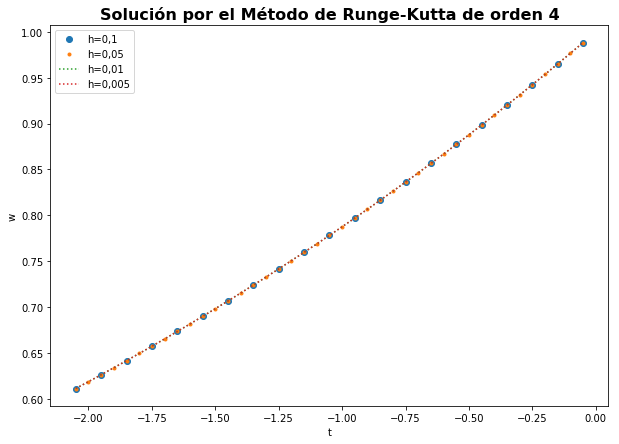

In [185]:
plt.figure(figsize=(10,7))
plt.plot(RK4(f1,t0,tf,y0,0.1)[:,0],RK4(f1,t0,tf,y0,0.1)[:,1],'o',label='h=0,1')
plt.plot(RK4(f1,t0,tf,y0,0.05)[:,0],RK4(f1,t0,tf,y0,0.05)[:,1],'.',label='h=0,05')
plt.plot(RK4(f1,t0,tf,y0,0.01)[:,0],RK4(f1,t0,tf,y0,0.01)[:,1],':',label='h=0,01')
plt.plot(RK4(f1,t0,tf,y0,0.005)[:,0],RK4(f1,t0,tf,y0,0.005)[:,1],':',label='h=0,005')
plt.title('Solución por el Método de Runge-Kutta de orden 4',fontsize=16,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)

### Método de Adams-Moulton de orden 2

El código del <b>Método de Adams-Moulton de orden 2</b> es el siguiente:

In [152]:
#Método de Adams-Moulton de Orden 2
def AM2(f,t0,tf,y0,h):
        N=int((tf-t0)/h)
        t=np.linspace(t0,tf,N+2)
        w=np.zeros(N+2)
        sol=np.zeros([N+2,2])
        w[0]= y0
        def aux(wi,args):
            ti,want,h=args
            return np.abs(want+h*(f(ti-h,want)+f(ti,wi))/2-wi)
        for i in range(1,N+2):
            initial_guess = w[i-1]
            w[i] = op.minimize(aux, initial_guess,args=[t[i],w[i-1],h])['x'] 
        for i in range(0,N+2):    
            sol[i,0]=t[i]
            sol[i,1]=w[i]
        return sol

Los resultados al aplicar el algoritmo son:

In [153]:
AM2(f1,t0,tf,y0,0.05)

array([[-2.05      ,  0.6113    ],
       [-2.        ,  0.6187514 ],
       [-1.95      ,  0.62629069],
       [-1.9       ,  0.63391883],
       [-1.85      ,  0.64163681],
       [-1.8       ,  0.64944561],
       [-1.75      ,  0.65734621],
       [-1.7       ,  0.66533962],
       [-1.65      ,  0.67342685],
       [-1.6       ,  0.68160891],
       [-1.55      ,  0.68988684],
       [-1.5       ,  0.69826166],
       [-1.45      ,  0.70673443],
       [-1.4       ,  0.71530619],
       [-1.35      ,  0.72397802],
       [-1.3       ,  0.73275099],
       [-1.25      ,  0.74162617],
       [-1.2       ,  0.75060466],
       [-1.15      ,  0.75968757],
       [-1.1       ,  0.76887599],
       [-1.05      ,  0.77817105],
       [-1.        ,  0.78757388],
       [-0.95      ,  0.79708561],
       [-0.9       ,  0.8067074 ],
       [-0.85      ,  0.81644039],
       [-0.8       ,  0.82628576],
       [-0.75      ,  0.83624469],
       [-0.7       ,  0.84631834],
       [-0.65      ,

Graficamos los resultados para distintos pasos $h$: 
* $h=0{,}1$,
* $h=0{,}05$, 
* $h=0{,}01$ y,
* $h=0{,}005$.

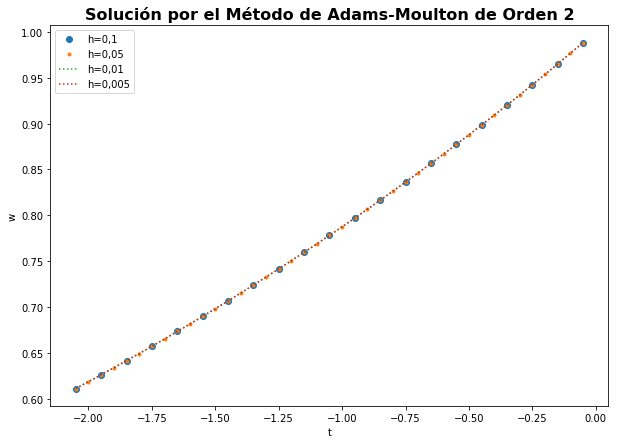

In [154]:
plt.figure(figsize=(10,7))
plt.plot(AM2(f1,t0,tf,y0,0.1)[:,0],AM2(f1,t0,tf,y0,0.1)[:,1],'o',label='h=0,1')
plt.plot(AM2(f1,t0,tf,y0,0.05)[:,0],AM2(f1,t0,tf,y0,0.05)[:,1],'.',label='h=0,05')
plt.plot(AM2(f1,t0,tf,y0,0.01)[:,0],AM2(f1,t0,tf,y0,0.01)[:,1],':',label='h=0,01')
plt.plot(AM2(f1,t0,tf,y0,0.005)[:,0],AM2(f1,t0,tf,y0,0.005)[:,1],':',label='h=0,005')
plt.title('Solución por el Método de Adams-Moulton de Orden 2',fontsize=16,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)

### Método de Adams-Moulton de orden 3
El código del Método de Adams-Moulton de orden 3 es el siguiente

In [157]:
#Método de Adams-Moulton de Orden 3
def AM3(f,t0,tf,y0,h):
        N=int((tf-t0)/h)
        t=np.linspace(t0,tf,N+2)
        w=np.zeros(N+2)
        sol=np.zeros([N+2,2])
        w[0]= y0
        k1=h*f(t[0],w[0])
        k2=h*f(t[0]+h/2,w[0]+0.5*k1)
        k3=h*f(t[0]+h,w[0]-k1+2*k2)
        w[1]=w[0]+(1/6)*(k1+4*k2+k3)
        def aux(wi,args):
            ti,w0,w1,h=args
            return np.abs(w1+h*(5*f(ti,wi)+8*f(ti-h,w1)-f(ti-2*h,w0))/12-wi)
        for i in range(2,N+2):
            initial_guess = w[i-1]
            w[i] = op.minimize(aux, initial_guess,args=[t[i],w[i-2],w[i-1],h])['x'] 
        for i in range(0,N+2):    
            sol[i,0]=t[i]
            sol[i,1]=w[i]
        return sol

Los resultados al aplicar el algoritmo son:


In [158]:
AM3(f1,t0,tf,y0,0.05)

array([[-2.05      ,  0.6113    ],
       [-2.        ,  0.61875132],
       [-1.95      ,  0.62629053],
       [-1.9       ,  0.6339186 ],
       [-1.85      ,  0.64163649],
       [-1.8       ,  0.6494452 ],
       [-1.75      ,  0.65734572],
       [-1.7       ,  0.66533904],
       [-1.65      ,  0.67342617],
       [-1.6       ,  0.68160814],
       [-1.55      ,  0.68988597],
       [-1.5       ,  0.69826069],
       [-1.45      ,  0.70673336],
       [-1.4       ,  0.71530503],
       [-1.35      ,  0.72397675],
       [-1.3       ,  0.73274961],
       [-1.25      ,  0.74162469],
       [-1.2       ,  0.75060307],
       [-1.15      ,  0.75968587],
       [-1.1       ,  0.76887417],
       [-1.05      ,  0.77816912],
       [-1.        ,  0.78757183],
       [-0.95      ,  0.79708345],
       [-0.9       ,  0.80670511],
       [-0.85      ,  0.81643798],
       [-0.8       ,  0.82628322],
       [-0.75      ,  0.83624202],
       [-0.7       ,  0.84631554],
       [-0.65      ,

Graficamos los resultados para distintos pasos $h$: 
* $h=0{,}1$,
* $h=0{,}05$, 
* $h=0{,}01$ y,
* $h=0{,}005$.

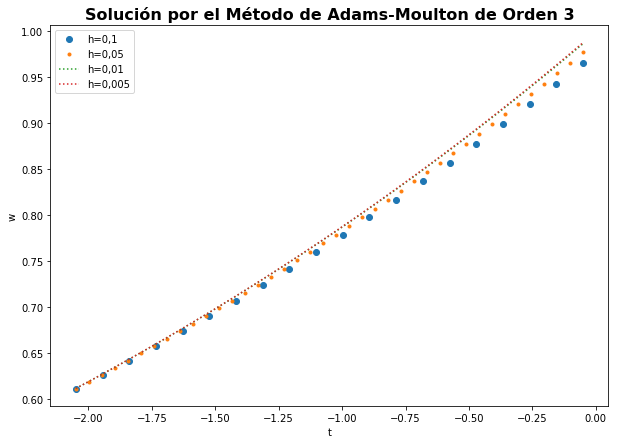

In [136]:
plt.figure(figsize=(10,7))
plt.plot(AM3(f1,t0,tf,y0,0.1)[:,0],AM3(f1,t0,tf,y0,0.1)[:,1],'o',label='h=0,1')
plt.plot(AM3(f1,t0,tf,y0,0.05)[:,0],AM3(f1,t0,tf,y0,0.05)[:,1],'.',label='h=0,05')
plt.plot(AM3(f1,t0,tf,y0,0.01)[:,0],AM3(f1,t0,tf,y0,0.01)[:,1],':',label='h=0,01')
plt.plot(AM3(f1,t0,tf,y0,0.005)[:,0],AM3(f1,t0,tf,y0,0.005)[:,1],':',label='h=0,005')
plt.title('Solución por el Método de Adams-Moulton de Orden 3',fontsize=16,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)

### Método de las Diferencias Regresivas de Orden 2

El código del <b>Método de las Diferencias Regresivas de Orden 2</b> es el siguiente:

In [159]:
#Método de las Diferencias Regresivas de Orden 2
def MDR2(f,t0,tf,y0,h):
        N=int((tf-t0)/h)
        t=np.linspace(t0,tf,N+2)
        w=np.zeros(N+2)
        sol=np.zeros([N+2,2])
        w[0]= y0
        w[1]=w[0]+h*f(t[0]+0.5*h,w[0]+0.5*h*f(t[0],w[0]))
        def aux(wi,args):
            ti,w1,w0,h=args
            return np.abs(4*w1/3-w0/3+2*h*f(ti,wi)/3-wi)
        for i in range(2,N+2):
            initial_guess = w[i-1]
            w[i] = op.minimize(aux, initial_guess,args=[t[i],w[i-1],w[i-2],h])['x'] 
        for i in range(0,N+2):    
            sol[i,0]=t[i]
            sol[i,1]=w[i]
        return sol

Los resultados al aplicar el algoritmo son:

In [160]:
MDR2(f1,t0,tf,y0,0.05)

array([[-2.05      ,  0.6113    ],
       [-2.        ,  0.61875115],
       [-1.95      ,  0.62629052],
       [-1.9       ,  0.63391885],
       [-1.85      ,  0.64163706],
       [-1.8       ,  0.6494461 ],
       [-1.75      ,  0.65734695],
       [-1.7       ,  0.66534061],
       [-1.65      ,  0.6734281 ],
       [-1.6       ,  0.68161043],
       [-1.55      ,  0.68988863],
       [-1.5       ,  0.69826373],
       [-1.45      ,  0.70673678],
       [-1.4       ,  0.71530883],
       [-1.35      ,  0.72398096],
       [-1.3       ,  0.73275422],
       [-1.25      ,  0.74162971],
       [-1.2       ,  0.75060852],
       [-1.15      ,  0.75969174],
       [-1.1       ,  0.76888048],
       [-1.05      ,  0.77817588],
       [-1.        ,  0.78757904],
       [-0.95      ,  0.79709112],
       [-0.9       ,  0.80671325],
       [-0.85      ,  0.8164466 ],
       [-0.8       ,  0.82629233],
       [-0.75      ,  0.83625162],
       [-0.7       ,  0.84632565],
       [-0.65      ,

Graficamos los resultados para distintos pasos $h$: 
* $h=0{,}1$,
* $h=0{,}05$, 
* $h=0{,}01$ y,
* $h=0{,}005$.

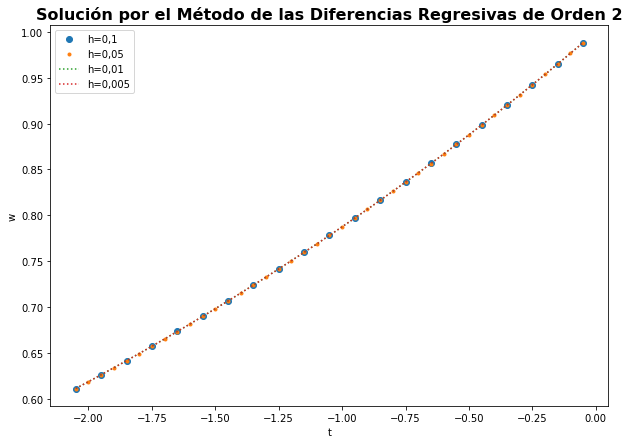

In [161]:
plt.figure(figsize=(10,7))
plt.plot(MDR2(f1,t0,tf,y0,0.1)[:,0],MDR2(f1,t0,tf,y0,0.1)[:,1],'o',label='h=0,1')
plt.plot(MDR2(f1,t0,tf,y0,0.05)[:,0],MDR2(f1,t0,tf,y0,0.05)[:,1],'.',label='h=0,05')
plt.plot(MDR2(f1,t0,tf,y0,0.01)[:,0],MDR2(f1,t0,tf,y0,0.01)[:,1],':',label='h=0,01')
plt.plot(MDR2(f1,t0,tf,y0,0.005)[:,0],MDR2(f1,t0,tf,y0,0.005)[:,1],':',label='h=0,005')
plt.title('Solución por el Método de las Diferencias Regresivas de Orden 2',fontsize=16,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)

### Método Predictor-Corrector de Adams de orden 2

El código del <b>Método de Predictor-Corrector de Adams de Orden 2</b> es el siguiente:

In [163]:
#Método Predictor-Corrector de Adams de Orden 2
def PCA2(f,t0,tf,y0,h):
        N=int((tf-t0)/h)
        t=np.linspace(t0,tf,N+2)
        w=np.zeros(N+2)
        sol=np.zeros([N+2,2])
        w[0]= y0
        w[1]=w[0]+h*f(t[0]+h/2,w[0]+(h/2)*f(t[0],w[0]))
        def aux(wi,args):
            ti,want,h=args
            return np.abs(want+h*(f(ti-h,want)+f(ti,wi))/2-wi)
        for i in range(2,N+2):
            initial_guess = w[i-1]++h*(3*f(t[i-1],w[i-1])-f(t[i-2],w[i-2]))
            w[i] = op.minimize(aux, initial_guess,args=[t[i],w[i-1],h])['x'] 
        for i in range(0,N+2):    
            sol[i,0]=t[i]
            sol[i,1]=w[i]
        return sol

Los resultados al aplicar el algoritmo son:

In [164]:
PCA2(f1,t0,tf,y0,0.05)

array([[-2.05      ,  0.6113    ],
       [-2.        ,  0.61875115],
       [-1.95      ,  0.62629045],
       [-1.9       ,  0.6339186 ],
       [-1.85      ,  0.64163658],
       [-1.8       ,  0.64944537],
       [-1.75      ,  0.65734598],
       [-1.7       ,  0.66533939],
       [-1.65      ,  0.67342661],
       [-1.6       ,  0.68160867],
       [-1.55      ,  0.6898866 ],
       [-1.5       ,  0.69826142],
       [-1.45      ,  0.70673419],
       [-1.4       ,  0.71530596],
       [-1.35      ,  0.72397779],
       [-1.3       ,  0.73275075],
       [-1.25      ,  0.74162594],
       [-1.2       ,  0.75060443],
       [-1.15      ,  0.75968733],
       [-1.1       ,  0.76887576],
       [-1.05      ,  0.77817082],
       [-1.        ,  0.78757365],
       [-0.95      ,  0.79708538],
       [-0.9       ,  0.80670716],
       [-0.85      ,  0.81644016],
       [-0.8       ,  0.82628552],
       [-0.75      ,  0.83624443],
       [-0.7       ,  0.84631808],
       [-0.65      ,

Graficamos los resultados para distintos pasos $h$: 
* $h=0{,}1$,
* $h=0{,}05$, 
* $h=0{,}01$ y,
* $h=0{,}005$.

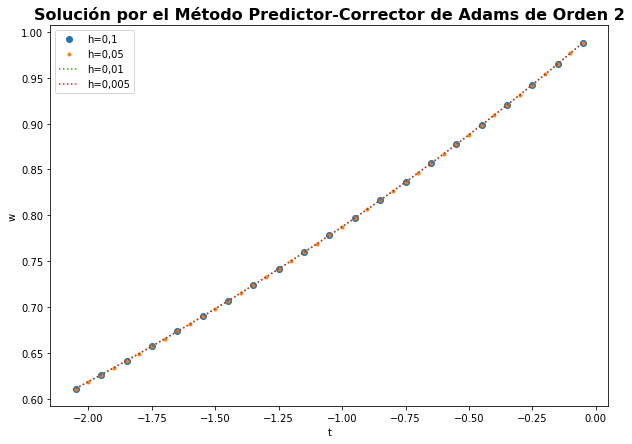

In [165]:
plt.figure(figsize=(10,7))
plt.plot(PCA2(f1,t0,tf,y0,0.1)[:,0],PCA2(f1,t0,tf,y0,0.1)[:,1],'o',label='h=0,1')
plt.plot(PCA2(f1,t0,tf,y0,0.05)[:,0],PCA2(f1,t0,tf,y0,0.05)[:,1],'.',label='h=0,05')
plt.plot(PCA2(f1,t0,tf,y0,0.01)[:,0],PCA2(f1,t0,tf,y0,0.01)[:,1],':',label='h=0,01')
plt.plot(PCA2(f1,t0,tf,y0,0.005)[:,0],PCA2(f1,t0,tf,y0,0.005)[:,1],':',label='h=0,005')
plt.title('Solución por el Método Predictor-Corrector de Adams de Orden 2',fontsize=16,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)

## Tabla comparativa

Tabla comparativa con los resultados obtenidos con todos los métodos de orden 2.

In [189]:
TC={'(A) t':EE(f1,t0,tf,y0,0.05)[:,0],'(B) EE':EE(f1,t0,tf,y0,0.05)[:,1],'(C) EI':EI(f1,t0,tf,y0,0.05)[:,1],'(D) Pto Medio':PtoMedio(f1,t0,tf,y0,0.05)[:,1],'(E) Euler Mej':EulerMej(f1,t0,tf,y0,0.05)[:,1],'(F) A-M O2':AM2(f1,t0,tf,y0,0.05)[:,1],'(G) A-M O3':AM3(f1,t0,tf,y0,0.05)[:,1],'(H) MDR2':MDR2(f1,t0,tf,y0,0.05)[:,1],'(I) PCA2':MDR2(f1,t0,tf,y0,0.05)[:,1],'(J) RK O4':RK4(f1,t0,tf,y0,0.05)[:,1]}#

In [190]:
pd.DataFrame(TC)
#df.style.set_caption('TABLA COMPARATIVA')

,(A) t,(B) EE,(C) EI,(D) Pto Medio,(E) Euler Mej,(F) A-M O2,(G) A-M O3,(H) MDR2,(I) PCA2,(J) RK O4
0,-2.05,0.6113,0.6113,0.6113,0.6113,0.611300,0.611300,0.611300,0.611300,0.611300
1,-2.00,0.6187,0.6188,0.6188,0.6188,0.618751,0.618751,0.618751,0.618751,0.618751
2,-1.95,0.6262,0.6264,0.6263,0.6263,0.626291,0.626291,0.626291,0.626291,0.626291
3,-1.90,0.6338,0.6341,0.6339,0.6339,0.633919,0.633919,0.633919,0.633919,0.633919
4,-1.85,0.6415,0.6419,0.6416,0.6416,0.641637,0.641636,0.641637,0.641637,0.641637
5,-1.80,0.6493,0.6498,0.6494,0.6494,0.649446,0.649445,0.649446,0.649446,0.649445
6,-1.75,0.6572,0.6578,0.6573,0.6573,0.657346,0.657346,0.657347,0.657347,0.657346
7,-1.70,0.6651,0.6658,0.6653,0.6653,0.665340,0.665339,0.665341,0.665341,0.665339
8,-1.65,0.6731,0.6739,0.6734,0.6734,0.673427,0.673426,0.673428,0.673428,0.673426
9,-1.60,0.6812,0.6821,0.6816,0.6816,0.681609,0.681608,0.681610,0.681610,0.681608


## Gráficos comparativos

Gráfico con la comparación de los distintos métodos.

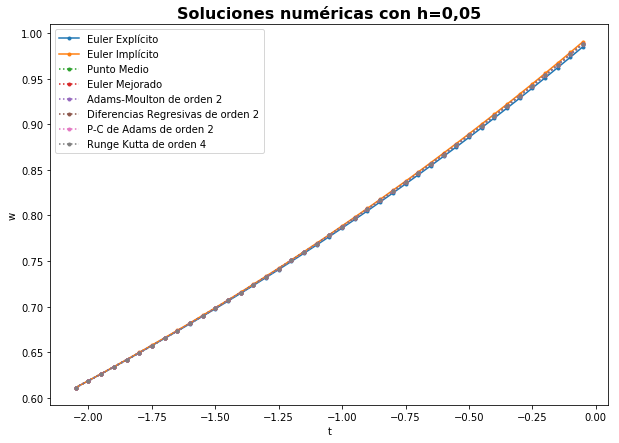

In [191]:
plt.figure(figsize=(10,7))
plt.plot(EE(f1,t0,tf,y0,0.05)[:,0],EE(f1,t0,tf,y0,0.05)[:,1],'.-',label='Euler Explícito')
plt.plot(EI(f1,t0,tf,y0,0.05)[:,0],EI(f1,t0,tf,y0,0.05)[:,1],'.-',label='Euler Implícito')
plt.plot(PtoMedio(f1,t0,tf,y0,0.05)[:,0],PtoMedio(f1,t0,tf,y0,0.05)[:,1],'.:',label='Punto Medio')
plt.plot(EulerMej(f1,t0,tf,y0,0.05)[:,0],EulerMej(f1,t0,tf,y0,0.05)[:,1],'.:',label='Euler Mejorado')
#plt.plot(RK3(f2,t0,tf,y0,0.1)[:,0],RK3(f2,t0,tf,y0,0.1)[:,1],'.:',label='Runge Kutta de orden 3')
plt.plot(AM2(f1,t0,tf,y0,0.05)[:,0],AM2(f1,t0,tf,y0,0.05)[:,1],'.:',label='Adams-Moulton de orden 2')
plt.plot(MDR2(f1,t0,tf,y0,0.05)[:,0],MDR2(f1,t0,tf,y0,0.05)[:,1],'.:',label='Diferencias Regresivas de orden 2')
plt.plot(PCA2(f1,t0,tf,y0,0.05)[:,0],PCA2(f1,t0,tf,y0,0.05)[:,1],'.:',label='P-C de Adams de orden 2')
plt.plot(RK4(f1,t0,tf,y0,0.05)[:,0],RK4(f1,t0,tf,y0,0.05)[:,1],'.:',label='Runge Kutta de orden 4')
plt.title('Soluciones numéricas con h=0,05',fontsize=16,fontweight="bold")
plt.xlabel('t')
plt.ylabel('w')
plt.legend(loc=2)